### Problem formulation

You are given data of the form (x_i, y_i), where x_i is the number of hours the student i has spent to study for the exam and y_i the result of the exam. If y_i = 0, the i_th student has failed, otherwise he passed the exam.

From the data, you are asked to develop a model that can predict whether a student pass the exam, knowing the number of hours he used for studying

### Dumb Hypothesis

$f(x) = \sigma(x - a)$ where $f(x) \in [0, 1]$ is the probability of a student passing the exam if he/she studied for x hours.

$\sigma(x)$ is the sigmoid activation function where $\sigma(x) = \frac{1}{1 + e ^ {-x}}$

### Why did I come up with that hypothesis?

- Of course we know it would be insufficient to predict exactly whether the student pass the exam or not, when the only information we got is the number of hours used for learning. There would be several other factors. So we just accept that we can never be correct?
- No, actually. We can still have some information with the number of hours. We clearly can observe a trend: The more hours we study, the more likely we pass the exam.
- Given the uncertainty of data, the lack of factors in data, predicting discretely of value 0 and 1 is pretty stupid. It is useless. What is more valuable is how likely (probability) that the student pass the exam.
- So now, our hypothesis is a function that returns a probability
- To think about it, we have to guess the underlying distribution of the population, given a sample of data.
- That's the high level for now. Then, why don't we just use the probability found in the sample as the distribution for population?
- That's a good point to revisit later.
- For this task, we naturally feel that there is a threshold that decides whether the student pass or not. The further the student get from the threshold, the more extreme likely the result would happen. What am I even saying haha. It's very similar to the graph of sigmoid function

![Sigmoid's Curve](./media/Logistic-curve.svg)

### Loss function

With the stupid hypothesis, let's define a loss function. The loss function can also be stupid. But it's good to do this so as we can feel the difference after seeing the running process.

How about we go with the normal squared error?
$$
    L(a) = \sum_{i = 1}^n (y_i - \sigma(x - a)) ^ 2
$$

Okay now let's go and find the derivative of the loss function

$$
\frac{dL}{da} = \sum_{i = 1}^n \frac{d(y_i - \sigma(x - a))^2}{da}
= \sum_{i = 1} ^ n 2(y_i - \sigma(x - a)) \frac{d(y_i - \sigma(x - a))}{da}\\
= \sum_{i = 1} ^ n 2(y_i - \sigma(x - a)) \frac{d(- \sigma(x - a))}{d(x - a)} \frac{d(x - a)}{da}
= \sum_{i = 1} ^ n 2(y_i - \sigma(x - a)) \sigma(x - a) (1 - \sigma(x - a))
$$

### Dataset

In [135]:
import numpy as np

X = np.array([[0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 1.75, 2.00, 2.25, 2.50, 
              2.75, 3.00, 3.25, 3.50, 4.00, 4.25, 4.50, 4.75, 5.00, 5.50]])
y = np.array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1])

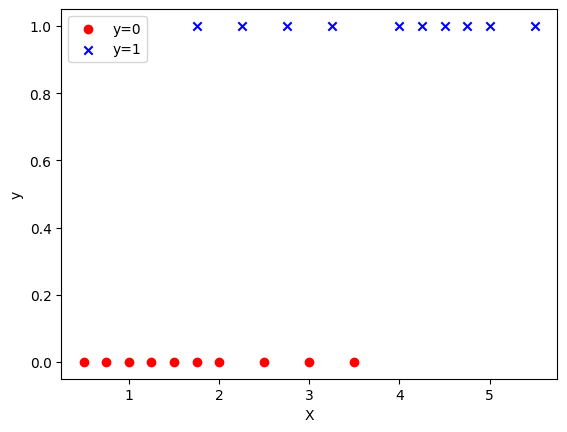

In [136]:
#Plot the data, points where y values = 0 has red color and y values = 1 has blue color
import matplotlib.pyplot as plt
plt.scatter(X[0,y==0], y[y==0], color='red', marker='o', label='y=0')
plt.scatter(X[0,y==1], y[y==1], color='blue', marker='x', label='y=1')
plt.xlabel('X')
plt.ylabel('y')
plt.legend(loc='upper left')
plt.show()


### Loss function implementation

In [137]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

def loss(a):
    """ 
        Loss function for variable a, which is the threshold.
    """
    loss_sum = 0
    for idx in range(len(X[0])):
        hours = X[0][idx]
        prediction = sigmoid(hours - a)
        truth = y[idx]
        loss_sum += (prediction - truth)**2
    return loss_sum

def loss_derivative(a):
    """ 
        Derivative of loss function for variable a, which is the threshold.
    """
    loss_derivative_sum = 0
    for idx in range(len(X[0])):
        hours = X[0][idx]
        prediction = sigmoid(hours - a)
        truth = y[idx]
        loss_derivative_sum += 2 * (truth - prediction) * sigmoid(hours - a) * (1 - sigmoid(hours - a))
    return loss_derivative_sum


### Gradient descent

In [138]:
import os
import imageio

def clear_graph_folder():
    folder = './graphs'
    for filename in os.listdir(folder):
        file_path = os.path.join(folder, filename)
        os.remove(file_path)

def create_gifs():
    # Combine all images in graphs folder into a gif
    images = []
    for i in range(len(os.listdir('./graphs'))):
        file_path = os.path.join('./graphs', str(i) + '.png')
        images.append(imageio.imread(file_path))
    imageio.mimsave('./1d-animation.gif', images, duration=0.5)


2.728165423924947


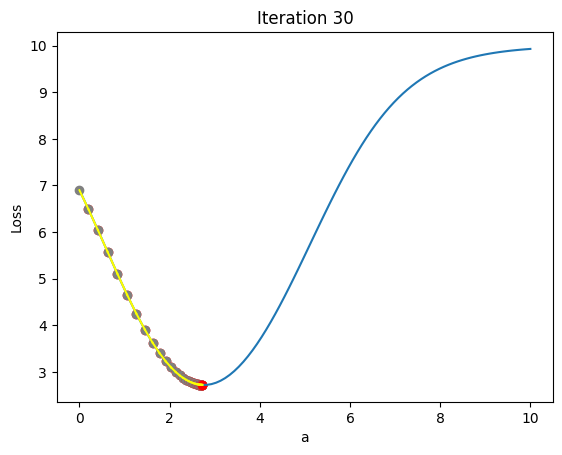

In [139]:
x = np.linspace(0, 10, 100)

def gradient_descent_process(start_a, x, learning_rate, iterations):
    """ 
        Gradient descent process for variable a, which is the threshold.
    """
    clear_graph_folder()
    a = start_a
    i = 0
    loss_values = loss(x)
    plt.plot(x, loss_values)
    while (True):
        gradient = loss_derivative(a)
        new_a = a - learning_rate * gradient
        plt.plot([a, new_a], [loss(a), loss(new_a)], color='yellow')
        #Draw the old point as gray and the new point as red
        plt.scatter(a, loss(a), color='gray', marker='o')
        plt.scatter(new_a, loss(new_a), color='red', marker='o')
        plt.title('Iteration %s' % i)
        plt.xlabel('a')
        plt.ylabel('Loss')
        plt.savefig('./graphs/%s.png' % i)
        a = new_a
        if (abs(gradient) < 0.000001):
            break
        i += 1
        if (i > iterations):
            break
    return a

a_optimal = gradient_descent_process(0, x, 0.1, 30)
print(a_optimal)

In [140]:
create_gifs()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_10480\2855370601.py:15: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(file_path))


![1D](1d-animation.gif)

### Distribution


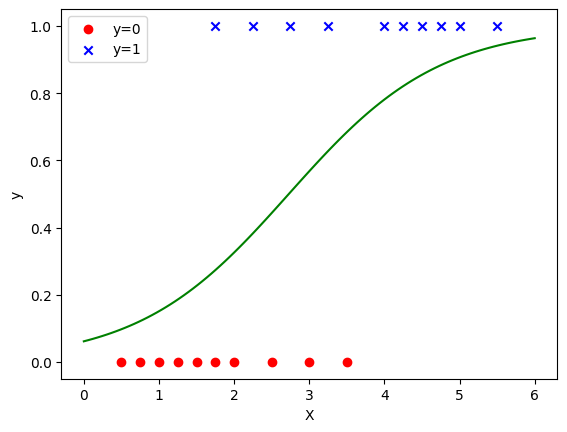

In [153]:
# plot the probability distribution, on top of the data plot
import matplotlib.pyplot as plt
plt.scatter(X[0,y==0], y[y==0], color='red', marker='o', label='y=0')
plt.scatter(X[0,y==1], y[y==1], color='blue', marker='x', label='y=1')
plt.xlabel('X')
plt.ylabel('y')
plt.legend(loc='upper left')

# Plot the probability distribution
x = np.linspace(0, 6, 100)
prediction = sigmoid(x - a_optimal)
plt.plot(x, prediction, color='green')

plt.show()


### Why not good


- The shape of the distribution is the same for all data (the shape as sigmoid function)
- The only difference for different data is that the S-shape can be move to the left or to the right thanks to the threshold parameter
- We want the the sigmoid to be able to shrink as well

### New hypothesis

To give the model the ability to stretch/shrink, we formulate the hypothesis as follow:
$
prob(x) = \sigma(ax+b)
$

Note that it doesn't matter if it is + b or -b.

### Loss function

Again, let's do very similarly. The only difference is that now we have partial derivative

$$
L(a, b) = \sum_{i = 1}^n (y_i - \sigma(ax + b))^2 \\

\frac{\partial L}{\partial a} = \sum_{i = 1}^n 2(y_i - \sigma(ax + b)) \frac{\partial y_i - \sigma(ax + b)}{\partial a}
= -\sum_{i = 1}^n 2(y_i - \sigma(ax + b))\sigma(ax + b)(1 - \sigma(ax + b)) x\\

\frac{\partial L}{\partial b} =  \sum_{i = 1}^n 2(y_i - \sigma(ax + b)) \frac{\partial y_i - \sigma(ax + b)}{\partial b}
= -\sum_{i = 1}^n 2(y_i - \sigma(ax + b))\sigma(ax + b)(1 - \sigma(ax + b))
$$

### Loss function implementation

In [143]:
def loss(a, b):
    """ 
        Loss function for variables a and b, which are the slope and intercept respectively.
    """
    loss_sum = 0
    for idx in range(len(X[0])):
        hours = X[0][idx]
        prediction = sigmoid(a * hours + b)
        truth = y[idx]
        loss_sum += (prediction - truth)**2
    return loss_sum

def loss_derivative_a(a, b):
    """ 
        Derivative of loss function with respect to a
    """
    loss_derivative_sum = 0
    for idx in range(len(X[0])):
        hours = X[0][idx]
        prediction = sigmoid(a * hours + b)
        truth = y[idx]
        loss_derivative_sum += -2 * (truth - prediction) * sigmoid(a * hours + b) * (1 - sigmoid(a * hours + b)) * hours
    return loss_derivative_sum

def loss_derivative_b(a, b):
    """ 
        Derivative of loss function with respect to b
    """
    loss_derivative_sum = 0
    for idx in range(len(X[0])):
        hours = X[0][idx]
        prediction = sigmoid(a * hours + b)
        truth = y[idx]
        loss_derivative_sum += -2 * (truth - prediction) * sigmoid(a * hours + b) * (1 - sigmoid(a * hours + b))
    return loss_derivative_sum

In [169]:
range_b = np.linspace(-6, 6, 100)
range_a = np.linspace(-6, 6, 100)
def gradient_descent_process_updated(start_a, start_b, range_a, range_b, learning_rate, iterations):
    """ 
        Gradient descent process for variables a and b
    """
    clear_graph_folder()
    a = start_a
    b = start_b
    i = 0
    grid_X, grid_Y = np.meshgrid(range_a, range_b)
    grid_Z = loss(grid_X, grid_Y)
    plt.contourf(grid_X, grid_Y, grid_Z, 200, cmap='viridis')
    plt.colorbar()
    while (True):
        gradient_a = loss_derivative_a(a, b)
        gradient_b = loss_derivative_b(a, b)
        new_a = a - learning_rate * gradient_a
        new_b = b - learning_rate * gradient_b
        if (new_a < range_a[0] or new_a > range_a[-1] or new_b < range_b[0] or new_b > range_b[-1]):
            print('New a or b is out of range')
            break
        # Draw a point (a, b) as gray and the new point (new_a, new_b) as red
        plt.scatter(a, b, color='gray', marker='o')
        plt.scatter(new_a, new_b, color='red', marker='o')
        plt.plot([a, new_a], [b, new_b], color='yellow')
        plt.title('Iteration %s' % i)
        plt.xlabel('a')
        plt.ylabel('b')
        plt.savefig('./graphs/%s.png' % i)
        a = new_a
        b = new_b
        if (abs(gradient_a) < 0.000001 or abs(gradient_b) < 0.000001):
            print('Gradient is small enough')
            break
        i += 1
        if (i > iterations):
            print('Iteration limit reached')
            break
    return a, b

Iteration limit reached


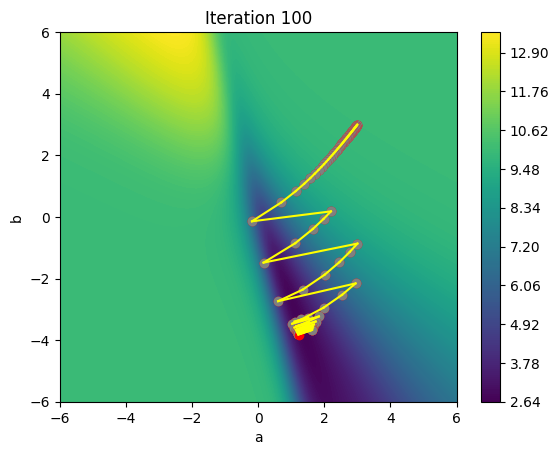

In [170]:
a_optimal, b_optimal = gradient_descent_process_updated(3, 3, range_a, range_b, 0.3, 100)

In [171]:
def create_gifs():
    # Combine all images in graphs folder into a gif
    images = []
    for i in range(len(os.listdir('./graphs'))):
        file_path = os.path.join('./graphs', str(i) + '.png')
        images.append(imageio.imread(file_path))
    imageio.mimsave('./2d-updated-animation.gif', images, duration=0.5)
create_gifs()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_10480\3920689012.py:6: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(file_path))


![2d](2d-updated-animation.gif)

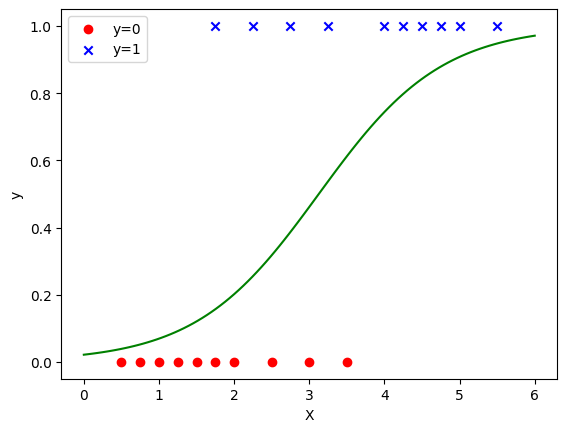

In [172]:
# plot the probability distribution, on top of the data plot
import matplotlib.pyplot as plt
plt.scatter(X[0,y==0], y[y==0], color='red', marker='o', label='y=0')
plt.scatter(X[0,y==1], y[y==1], color='blue', marker='x', label='y=1')
plt.xlabel('X')
plt.ylabel('y')
plt.legend(loc='upper left')

# Plot the probability distribution
x = np.linspace(0, 6, 100)
prediction = sigmoid(a_optimal * x + b_optimal)
plt.plot(x, prediction, color='green')

plt.show()

### Another attempt with different starting point

Iteration limit reached


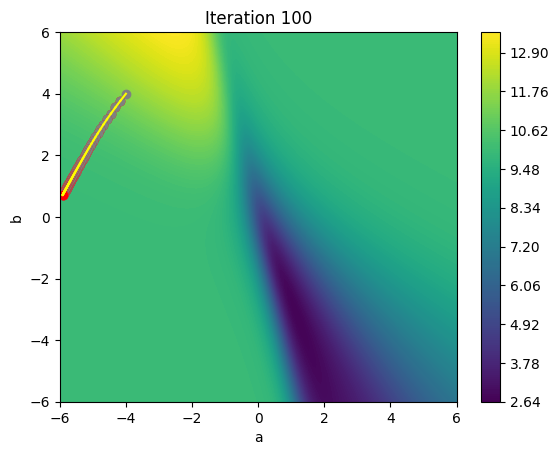

In [173]:
a_optimal, b_optimal = gradient_descent_process_updated(-4, 4, range_a, range_b, 0.3, 100)

### Conclusion

- The loss function is not convex with loss square function
- Gradient descent is very difficult (the example above will never converge)
- In the first example (1D), the graph is convex but it's no longer convex for 2D
- We want something that is convex

### Why is our loss function not convex?

We need a mathematic tool to analyse whether a function is convex or not. This branch of mathematic is called convex analysis. Let's try to cook something up

Firstly, think a bit about convexity. Is the loss function in the first example convex? It does look to be convex. But it's actually not. What is convexity? Define it!

Theoretically, our loss function is a sum of nonconvex functions. How can it be convex then!!

### How to design a convex function?

- A sum of convex functions is a convex function
- A composition of a convex function and a non convex function is not necessarily a convex function
- A function is log convex if log(f) is a convex function. Sigmoid is happened to be log convex
- More information [here](https://en.wikipedia.org/wiki/Logarithmically_convex_function)
- $f(x) = e ^ {|x|^p}$ is actually log convex